___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочный проект по линейной регрессии

Мы изучили построение признаков, кросс-валидацию и поиск по сетке. Пришло время проверить Ваши новые навыки. Добро пожаловать на проверочный проект по машинному обучению! В этом проекте у нас будут достаточно подробные пошаговые инструкции. Будущие проекты будут уже в более свободной форме. Мы начнём проект с финальной версии набора данных Ames Housing, с которым мы работали в разделе "построение признаков" этого курса. Цель этого проекта - создать модель линейной регрессии, обучить её на данных с поиском оптимальных значений параметров по сетке, и затем оценить модель на тестовом наборе данных.

---
---
---
## Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: Выполните ячейки ниже для импорта библиотек и загрузки данных. Возможно в будущем Вам понадобятся дополнительные команды import от scikit-learn.**

### Imports

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Данные

In [57]:
df = pd.read_csv("../DATA/AMES_Final_DF.csv")

In [58]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [60]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

**ЗАДАНИЕ: Мы будем пытаться спрогнозировать значение колонки SalePrice. Разделите данные на две части - признаки X и целевая переменная y.**

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
poly_converter = PolynomialFeatures(degree=2)

In [63]:
poly_features = poly_converter.fit_transform(X)

**ЗАДАНИЕ: С помощью scikit-learn разделите и X, и y на обучающий и тестовый наборы данных. Поскольку далее мы будем использовать поиск по сетке, то выделите под тестовые данные 10% от всех данных. Чтобы получить такое же разбиение данных, как и в нашем блокноте, можете использовать random_state = 101.**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: Признаки в этом наборе данных имеют различный масштаб и различные единицы измерения. Для оптимальной работы регрессии, выполните масштабирование признаков X. Обратите внимание на то, какие данные подавать на вход для .fit(), а какие данные на вход для .transform().**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train = scaler.transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

**ЗАДАНИЕ: Мы будем использовать модель "Elastic Net". Создайте экземпляр модели ElasticNet в scikit-learn, используя параметры по умолчанию.**

In [71]:
from sklearn.linear_model import ElasticNet

**ЗАДАНИЕ: Модель Elastic Net работает с двумя основными параметрами - alpha и L1_ratio. Создайте словарь с набором различных значений этих параметров, для поиска по сетке. Вы можете выбрать различные значения параметров, но имейте ввиду, что Ваши результаты могут не совпасть с результатами в блокноте с решениями.**

In [124]:
elastic_model = ElasticNet(max_iter=1_000_000)

In [125]:
from sklearn.metrics._scorer import _SCORERS

In [126]:
_SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'd2_absolute_error_score', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_w

**ЗАДАНИЕ: С помощью scikit-learn создайте объект GridSearchCV и запустите поиск по сетке для нахождения наилучших параметров модели, используя обучающие данные (предварительно смасштабированные). [Для некоторых комбинаций параметров Вы можете получить предупреждения (warnings).](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
grid = GridSearchCV(estimator=elastic_model, param_grid={'alpha': [1, 2, 5, 20, 50, 70, 100], 'l1_ratio': [0.1, .3, .5, .7, .9, .99, 1]}, scoring='neg_mean_squared_error', cv=5)

**ЗАДАНИЕ: Отобразите наилучшую комбинацию параметров для Вашей модели.**

In [129]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [1, 2, 5, 20, 50, 70, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [130]:
grid.best_params_

{'alpha': 100, 'l1_ratio': 1}

{'alpha': 100, 'l1_ratio': 1}

In [131]:
y_predicts = grid.predict(X_test)

**ЗАДАНИЕ: Оцените работу модели на тестовом наборе данных (предварительно смасштабированном) в 10%, которые модель ещё не видела. В блокноте с решениями мы получили MAE = $\$$14149 и RMSE = $\$$20532**

In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [133]:
MAE = mean_absolute_error(y_test, y_predicts)
MAE

14195.35490056217

In [134]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predicts))
RMSE

20558.50856689317

## Отличная работа!

----

In [135]:
from sklearn.linear_model import ElasticNetCV

In [136]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                                eps=0.001, 
                                n_alphas=100)

In [137]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [138]:
elastic_cv_model.l1_ratio_

1.0

In [139]:
y_predicts_cv = elastic_cv_model.predict(X_test)

In [140]:
MAE = mean_absolute_error(y_test, y_predicts_cv)
MAE

14186.390457864794

In [141]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predicts_cv))
RMSE

20558.75100803517

In [142]:
elastic_cv_model.coef_

array([ 6.87037937e+02,  4.84942517e+03,  1.03342708e+04,  6.08113119e+03,
        1.11780080e+04,  2.00056792e+03,  5.24877483e+03,  9.41911921e+03,
        1.81303920e+03, -0.00000000e+00,  8.86459013e+03,  0.00000000e+00,
        2.84147547e+03, -8.93605667e+02,  2.81979952e+04,  5.81699860e+02,
       -1.68170177e+02,  1.27949688e+03,  8.95515355e+02, -3.48282962e+03,
       -2.19552420e+03,  0.00000000e+00,  2.30780384e+03, -0.00000000e+00,
        2.20983219e+03,  3.24293165e+03,  1.00947793e+03,  2.03295324e+02,
        1.85535356e+02, -0.00000000e+00,  2.16960791e+03,  1.81708529e+03,
        1.61844829e+02, -3.17687575e+02, -5.22473131e+02, -4.57629501e+02,
       -1.12934934e+03,  0.00000000e+00, -2.56197027e+02,  1.55646089e+03,
        1.65633285e+03,  6.21593513e+02,  7.63498542e+02,  3.79870977e+02,
       -0.00000000e+00,  1.17035019e+03, -0.00000000e+00, -0.00000000e+00,
        2.57096173e+02, -2.13345359e+03, -4.18822458e+02,  0.00000000e+00,
        0.00000000e+00,  

In [143]:
test_residuals = y_test - y_predicts_cv

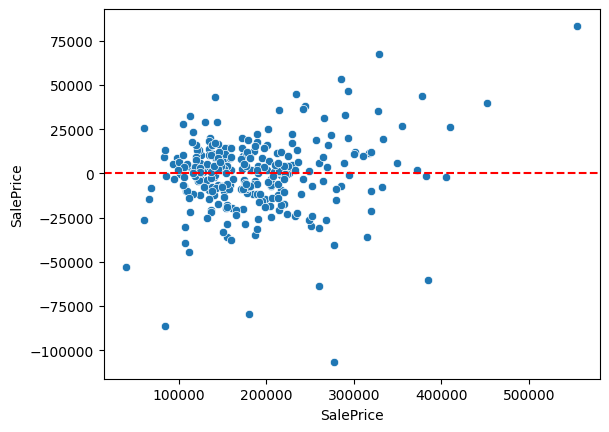

In [148]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')